# Fidelity-Interpretability analysis on the CIFAR10 dataset.

In [1]:
import sys
sys.path.append('..')

import warnings
warnings.filterwarnings('once')

from utils.plotting import *

%matplotlib inline

/home/thanos/.envs/dl/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/thanos/.envs/dl/lib/python3.5/site-packages/tensorflow/python/keras/backend.py:5605: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/thanos/.keras/keras.json' mode='r' encoding='UTF-8'>
  _config = json.load(open(_config_path))
/home/thanos/.envs/dl/lib/python3.5/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])


Load the baseline and the logs.

In [2]:
baseline_loc = '../results/fashion/seeker/default/baseline.txt'
with open(baseline_loc) as f:
    baseline = float(f.read())
print('Baseline accuracy: {:.2f}%'.format(baseline * 100))

# Deterministic
experiment_dir = '../logs/fashion/hns/deterministic/full_training_10/'
det_epoch_logs = load_and_process_epoch_logs_from_dir(experiment_dir)

# ST
experiment_dir = '../logs/fashion/hns/stochastic/st1/full_training_10/'
st1_epoch_logs = load_and_process_epoch_logs_from_dir(experiment_dir)

# SA-0.1
experiment_dir = '../logs/fashion/hns/stochastic/sa/rate_0.1/full_training_10/'
sa_epoch_logs = load_and_process_epoch_logs_from_dir(experiment_dir)

# SA-0.5
experiment_dir = '../logs/fashion/hns/stochastic/sa/rate_0.5/full_training_10/'
sa_epoch_logs = load_and_process_epoch_logs_from_dir(experiment_dir)

# SA-1.0
experiment_dir = '../logs/fashion/hns/stochastic/sa/rate_1.0/full_training_10/'
sa_epoch_logs = load_and_process_epoch_logs_from_dir(experiment_dir)

det = pd.concat(det_epoch_logs)
st1 = pd.concat(st1_epoch_logs)
sa = pd.concat(sa_epoch_logs)

W0421 10:18:24.832705 140089848133376 deprecation.py:323] From /home/thanos/.envs/dl/lib/python3.5/site-packages/tensorflow/python/summary/summary_iterator.py:68: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Baseline accuracy: 98.87%


Compute the Fidelity, the Interpretability and the FIR.

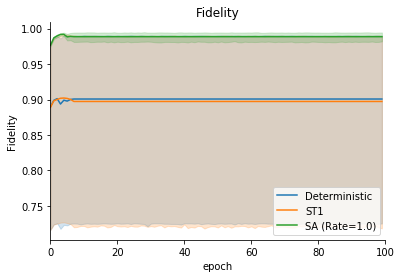

In [3]:
sns.lineplot(x='step', y='Fidelity', data=det, label='Deterministic')
sns.lineplot(x='step', y='Fidelity', data=st1, label='ST1')
sns.lineplot(x='step', y='Fidelity', data=sa, label='SA (Rate=1.0)')

plt.legend(loc='lower right')
plt.xlabel('epoch')

plt.title('Fidelity')

plt.xlim([0, 100])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

See how the models' classification performance improves through training.

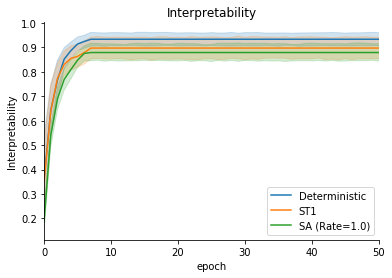

In [4]:
sns.lineplot(x='step', y='Interpretability', data=det, label='Deterministic')
sns.lineplot(x='step', y='Interpretability', data=st1, label='ST1')
sns.lineplot(x='step', y='Interpretability', data=sa, label='SA (Rate=1.0)')

plt.legend(loc='lower right')
plt.xlabel('epoch')

plt.title('Interpretability')

plt.xlim([0, 50])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

See how the fidelity of the models improves.

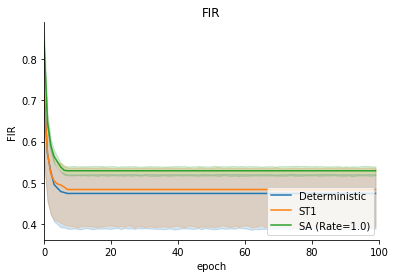

In [5]:
sns.lineplot(x='step', y='FIR', data=det, label='Deterministic')
sns.lineplot(x='step', y='FIR', data=st1, label='ST1')
sns.lineplot(x='step', y='FIR', data=sa, label='SA (Rate=1.0)')

plt.legend(loc='lower right')
plt.xlabel('epoch')

plt.title('FIR')

plt.xlim([0, 100])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

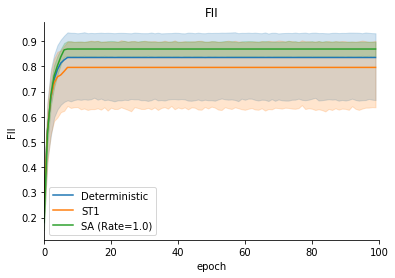

In [6]:
sns.lineplot(x='step', y='FII', data=det, label='Deterministic')
sns.lineplot(x='step', y='FII', data=st1, label='ST1')
sns.lineplot(x='step', y='FII', data=sa, label='SA (Rate=1.0)')

plt.legend(loc='lower left')
plt.xlabel('epoch')

plt.title('FII')

plt.xlim([0, 100])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

Compute metrics for the "best model".

In [7]:
sa.iloc[np.argmax(det['FII'].values)]

Average loss per epoch    0.046696
FII                       0.929547
FIR                       0.498725
Fidelity                  0.961675
Interpretability          0.966591
Validation accuracy       0.950781
step                      7.000000
Name: 7, dtype: float64

Generate the final plot.

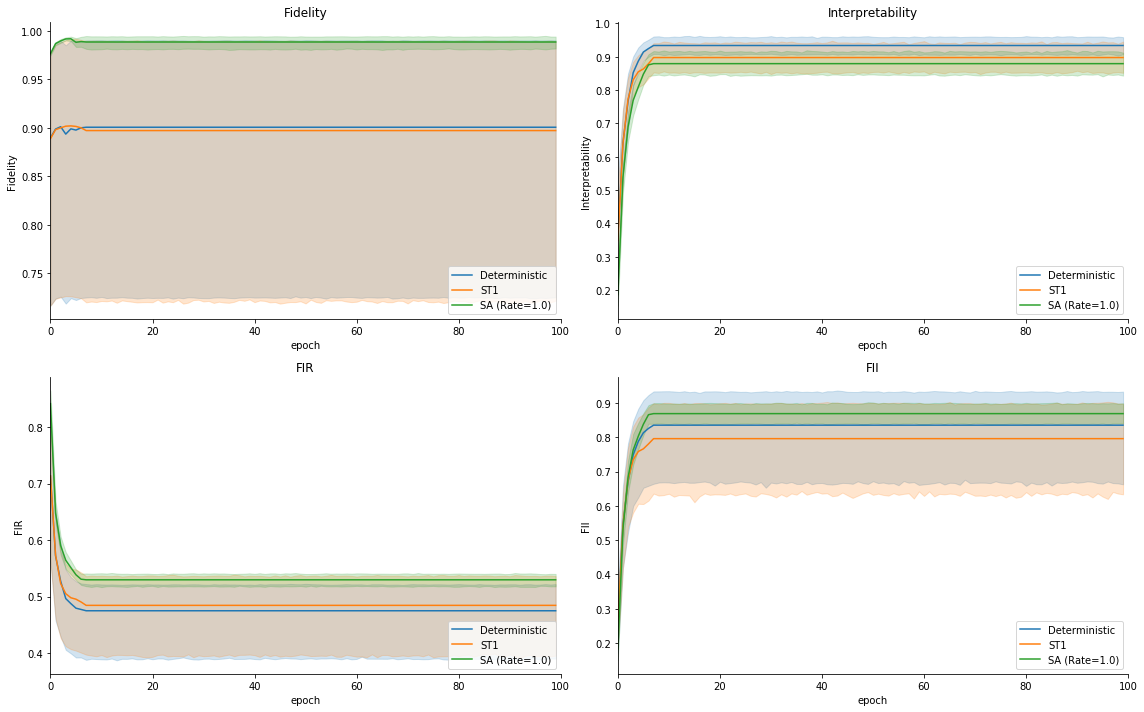

In [8]:
plt.figure(figsize=(16, 10))

ax = plt.subplot(221)

sns.lineplot(x='step', y='Fidelity', data=det, label='Deterministic', ax=ax)
sns.lineplot(x='step', y='Fidelity', data=st1, label='ST1', ax=ax)
sns.lineplot(x='step', y='Fidelity', data=sa, label='SA (Rate=1.0)', ax=ax)

plt.legend(loc='lower right')
plt.xlabel('epoch')

plt.title('Fidelity')

plt.xlim([0, 100])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(222)

sns.lineplot(x='step', y='Interpretability', data=det, label='Deterministic', ax=ax)
sns.lineplot(x='step', y='Interpretability', data=st1, label='ST1', ax=ax)
sns.lineplot(x='step', y='Interpretability', data=sa, label='SA (Rate=1.0)', ax=ax)

plt.legend(loc='lower right')
plt.xlabel('epoch')

plt.title('Interpretability')

plt.xlim([0, 100])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(223)

sns.lineplot(x='step', y='FIR', data=det, label='Deterministic', ax=ax)
sns.lineplot(x='step', y='FIR', data=st1, label='ST1', ax=ax)
sns.lineplot(x='step', y='FIR', data=sa, label='SA (Rate=1.0)', ax=ax)

plt.legend(loc='lower right')
plt.xlabel('epoch')

plt.title('FIR')

plt.xlim([0, 100])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = plt.subplot(224)

sns.lineplot(x='step', y='FII', data=det, label='Deterministic', ax=ax)
sns.lineplot(x='step', y='FII', data=st1, label='ST1', ax=ax)
sns.lineplot(x='step', y='FII', data=sa, label='SA (Rate=1.0)', ax=ax)

plt.legend(loc='lower right')
plt.xlabel('epoch')

plt.title('FII')

plt.xlim([0, 100])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('figures/fashion_results.pdf', bbox_inches='tight')

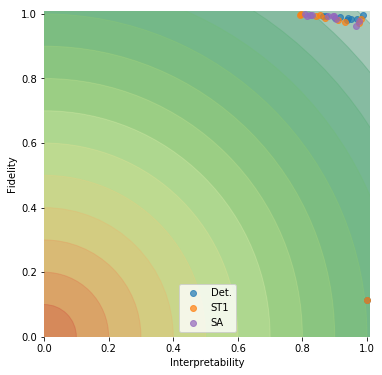

In [9]:
plt.figure(figsize=(6, 6))

fidelity_interpretability_projection([det_epoch_logs, st1_epoch_logs, sa_epoch_logs],
                                     baseline, 
                                     labels=['Det.', 'ST1', 'SA'],
                                     colors=['C0', 'C1', 'C4'],
                                     max_fii=True)

plt.savefig('figures/fashion_2d.pdf', bbox_inches='tight')

## Best model

We consider the best model to be the one that scored the highest FII. Find the best thresholding.

In [10]:
print('Best det FII:', np.max([np.max(log['FII']) for log in det_epoch_logs]))
print('Best ST1 FII:', np.max([np.max(log['FII']) for log in st1_epoch_logs]))
print('Best SA FII: ', np.max([np.max(log['FII']) for log in sa_epoch_logs]))

Best det FII: 0.982273280620575
Best ST1 FII: 0.9664164185523987
Best SA FII:  0.9524304270744324


Print its stats.

In [11]:
best_model = np.argmax([np.max(log['FII']) for log in det_epoch_logs])
best_fii = np.argmax(det_epoch_logs[best_model]['FII'].values)
det_epoch_logs[best_model].iloc[[best_fii]]

,Average loss per epoch,FII,FIR,Fidelity,Interpretability,Validation accuracy,step
7,0.01737,0.982273,0.502194,0.995456,0.986757,0.98418,7
